In [1]:
import pandas as pd
import seaborn as sns

In [2]:
driver_df = pd.read_csv(r"C:\Users\HP\Desktop\Data_Science\ML\Driver_Data\driver_data.csv")
driver_df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
driver_df.shape

(4000, 3)

In [4]:
# dropping the id column

driver_df.drop("id",axis=1, inplace =True) # inplace equal to True for permenant change.

In [5]:
driver_df.shape

(4000, 2)

In [6]:
driver_df.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


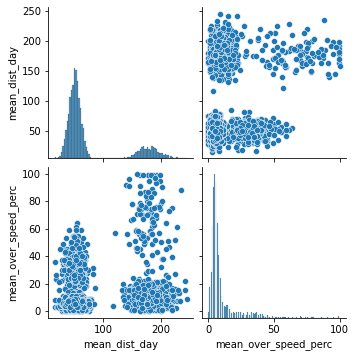

In [7]:
sns.pairplot(driver_df)

# Let's Build K-means Model


In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans_model = KMeans(n_clusters =2) # n_clusters is the k value

In [10]:
kmeans_model.fit(driver_df)

KMeans(n_clusters=2)

In [11]:
# taking a look at the centroid values

print("Centroid co-ordinates of the 2 clusters are : ")
print("----------------------------------------------")

print(kmeans_model.cluster_centers_)


Centroid co-ordinates of the 2 clusters are : 
----------------------------------------------
[[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


In [12]:
# above there are only two columns in metric as n_clusters = 2 if n_clusters is 10 the there will be 10 row/co-ordinates.

In [13]:
print("Cluster labels # for various data points present in the dataset are : ")

print(kmeans_model.labels_)

Cluster labels # for various data points present in the dataset are : 
[0 0 0 ... 1 1 1]


In [14]:
driver_df["Cluster labels"] = kmeans_model.labels_

In [15]:
driver_df.head()

,mean_dist_day,mean_over_speed_perc,Cluster labels
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


To ensure that cluster label that are generated belongs to all datapoints.

In [16]:
print(len(kmeans_model.labels_))

4000


here,we could infer that cluster label generated belong to all datapoints as length is 4000

In [17]:
driver_df.tail(5)

,mean_dist_day,mean_over_speed_perc,Cluster labels
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1
3999,168.03,9,1


# Let's Visualize the clusters

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


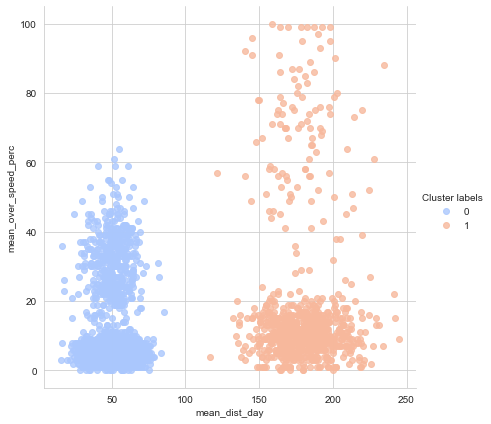

In [18]:
# plot the data 
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=driver_df, hue='Cluster labels',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)



# Elbow method using WCSS

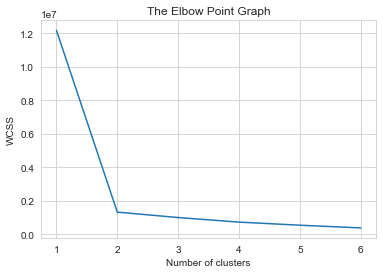

In [19]:
import matplotlib.pyplot as plt 
wcss = []
for i in range(1, 7):
    kmeans1 = KMeans(n_clusters = i)
    kmeans1.fit(driver_df)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans1.inertia_)  
    
#Plotting The Elbow graph
plt.plot(range(1, 7), wcss) # plot(x,y)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



# End of Session..